<a href="https://colab.research.google.com/github/Copita12/MLCopita/blob/master/TP5_Aprendizaje_de_Maquinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio consumidores



In [ ]:
import pandas as pd
customers = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectWC/data/wholesale_customers_data.csv")
customers.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [ ]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


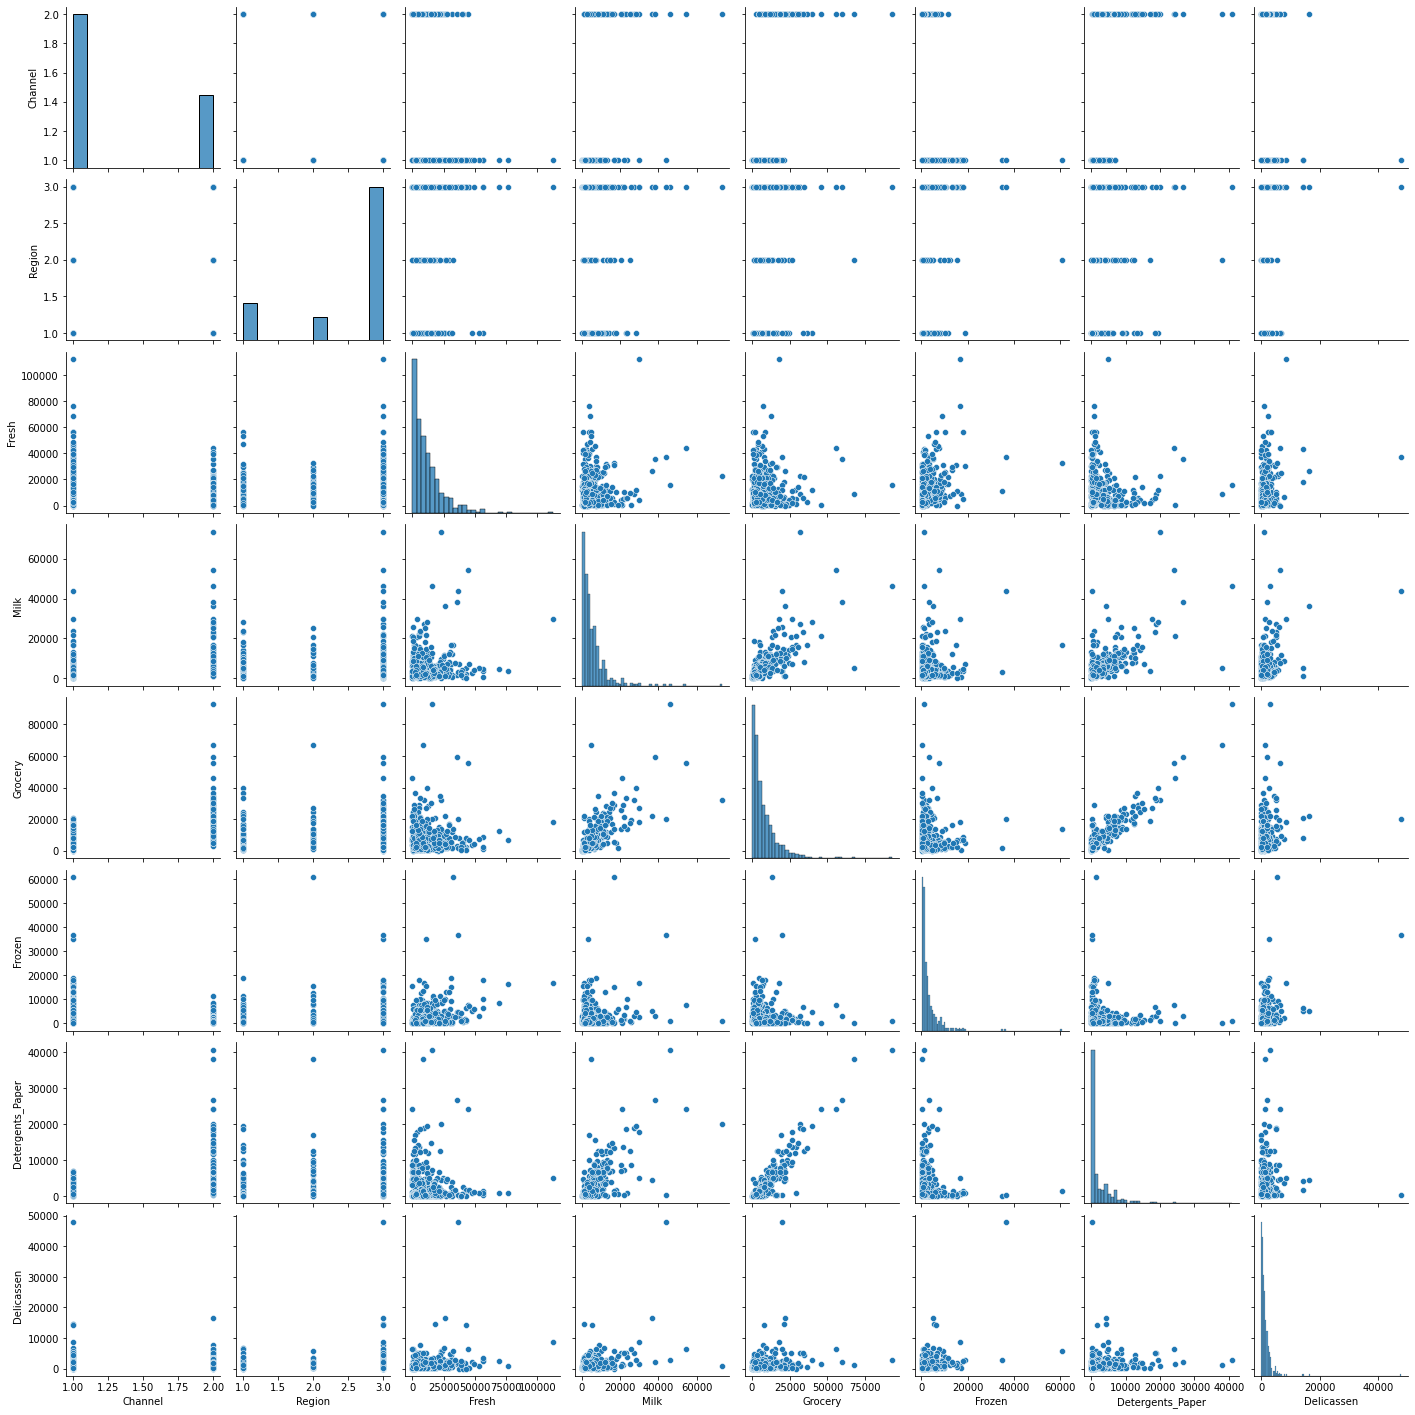

In [ ]:
import seaborn as sns
cols = ['Channel','Region','Fresh', 'Milk',	'Grocery', 'Frozen',	'Detergents_Paper',	'Delicassen']
sns.pairplot(customers[cols])

## KMeans
Buscamos la cantidad optima de clusters, para esto utilizamos la regla del codo


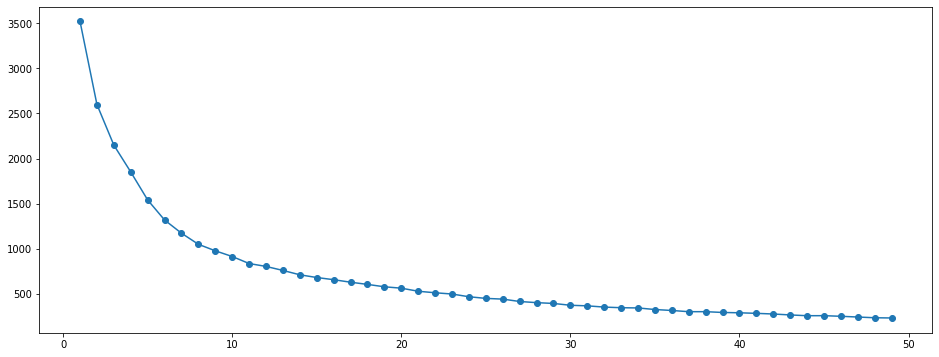

In [ ]:
X = customers[cols]

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range(1,50)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(X_scaled)
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o");

Lo mas optimo seria utilizar 10 clusters, acontinuacion buscamos los centroides de estos

In [ ]:
clusters = KMeans(10)

clusters.fit(X)
clusters.fit(X)
clusters.fit(X)
clusters.fit(X)

centroides_km = clusters.cluster_centers_
labels_km = clusters.labels_

centroides_km, labels_km

(array([[1.72151899e+00, 2.59493671e+00, 4.42203797e+03, 7.67331646e+03,
         1.03650759e+04, 1.31022785e+03, 4.50939241e+03, 1.41515190e+03],
        [1.00000000e+00, 3.00000000e+00, 8.57796667e+04, 1.25036667e+04,
         1.26196667e+04, 1.39916667e+04, 2.15900000e+03, 3.95800000e+03],
        [1.14285714e+00, 2.55102041e+00, 1.56821327e+04, 2.58828571e+03,
         3.59181633e+03, 3.43734694e+03, 7.84163265e+02, 1.15872449e+03],
        [2.00000000e+00, 2.36363636e+00, 1.00582727e+04, 2.11880000e+04,
         3.61606364e+04, 2.28245455e+03, 1.77857273e+04, 3.79600000e+03],
        [2.00000000e+00, 3.00000000e+00, 2.98625000e+04, 5.30807500e+04,
         6.00157500e+04, 3.26225000e+03, 2.79422500e+04, 3.08225000e+03],
        [1.02816901e+00, 2.50000000e+00, 4.93460563e+03, 2.30122535e+03,
         2.78662676e+03, 2.66785915e+03, 6.49049296e+02, 8.54161972e+02],
        [1.00000000e+00, 2.50000000e+00, 3.47820000e+04, 3.03670000e+04,
         1.68980000e+04, 4.87015000e+04, 7.55

En un grafico tridimensional podemos ubicar los centroides segun 3 atributos a evaluar y ver como se agrupan cada uno de los clientes

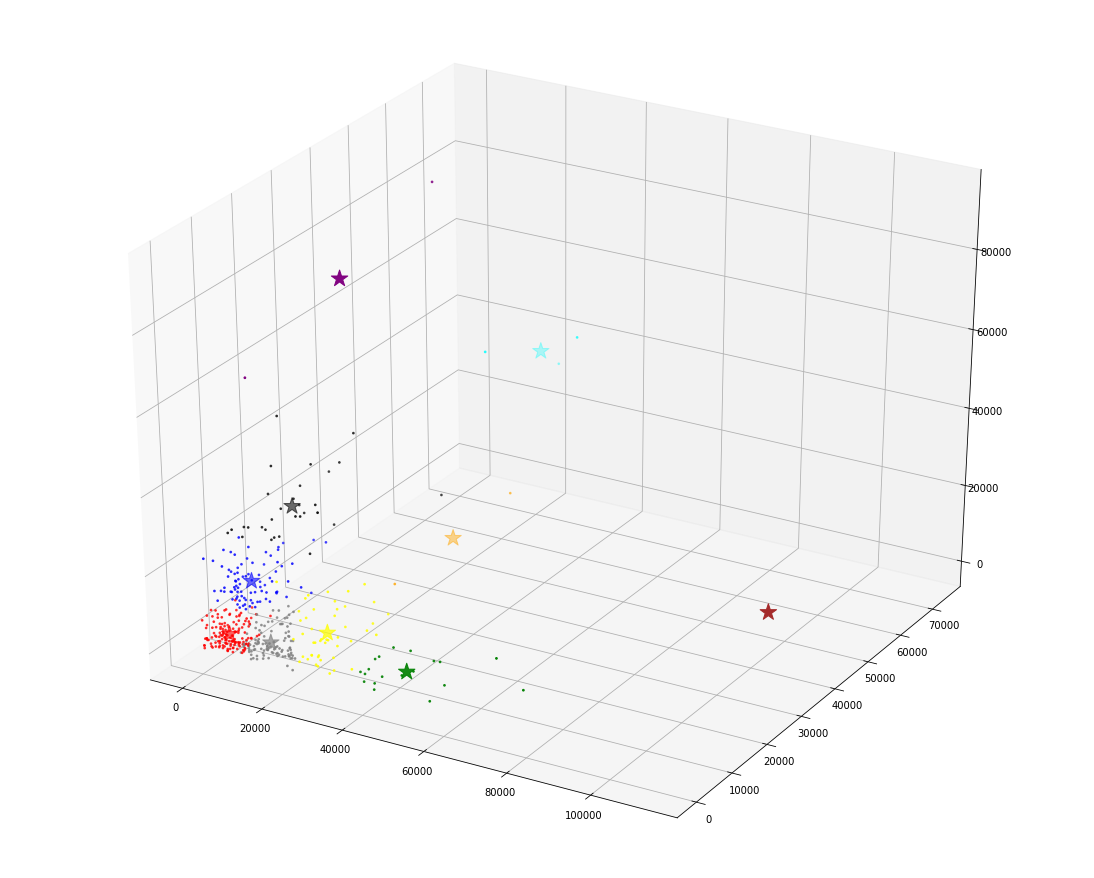

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
X = X.to_numpy()
C = centroides_km
colores=['red','green','blue','yellow','cyan', 'black','orange','purple', 'gray', 'brown']
asignar=[]
{a: asignar.append(colores[a])for a in labels_km} 

fig = plt.figure(figsize=[15,12])
ax = Axes3D(fig)

#'Fresh', 'Milk',	'Grocery'
ax.scatter(X[:, 2], X[:, 3], X[:, 4], c=asignar, s=3)
ax.scatter(C[:, 2], C[:, 3], C[:, 4], marker='*', c=colores, s=300)

Podemos concluir en que mediante el metodo de clustering KMeans, podemos dividir a los clientes en grupos mas pequeños segun su patron de compras anuales y visualizarlos en funcion de otras 3 variables para corroborar como se agrupan dependiendo de su distancia al centroide del cluster.